# PyBer Ride Sharing Analysis

### The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:


Average Fare ($) Per City
Total Number of Rides Per City
Total Number of Drivers Per City
City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:


% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type


As final considerations:


You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
Remember when making your plots to consider aesthetics!


You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.


You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.


See Example Solution for a reference on expected format.

###    Analysis
    
    - Highly signicant are the differences in the concentration of rides, Percentage of Total Fares by City Type and Percentage of Total Rides by City Type as demonstrated on the analysis chart.

    - Urban also have more significant number of drivers as compared to drivers from the other classified location types. 
    
    - However, urban have a lower fare average. It would be interesting to check and correlate the fare data against trip distance data. Trip distance could be a factor or if the factor of concentration of ride sharing drivers particularly on urban areas.
    
    - With the two data, it opens the question if one could earn good income driving for a ride sharing and what specific location type will be ideal to earn the most. 
    
    - On management side, the higher number and percentages gives conclusive information about the company's geographic concentration of its operation and locations it needs to work-on.

In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
#import pyber files using pandas

loc_data = os.path.join('raw_data', 'city_data.csv')
ride_data = os.path.join('raw_data', 'ride_data.csv')

#Read the flat files and create dataframes using pythin pandas
loc_df = pd.read_csv(loc_data)
ride_df =pd.read_csv(ride_data)

In [3]:
#view sample contents of the location file
loc_df.head(2)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban


In [4]:
#view sample contents of the ride information
ride_df.head(2)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942


In [5]:
#Check number of count of records for Location Dataframe
loc_df.count()

city            126
driver_count    126
type            126
dtype: int64

In [6]:
#Drop duplicated records and keeping the first
loc_df = loc_df.drop_duplicates('city', keep='first')
loc_df.count()

city            125
driver_count    125
type            125
dtype: int64

In [7]:
# Check for missing values
loc_df.isnull().values.any()

False

In [8]:
#Check number of count of records for Location Dataframe
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
#Drop duplicated records and keeping the first
ride_df = ride_df.drop_duplicates('ride_id', keep='first')
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Check for missing values
ride_df.isnull().values.any()

False

In [11]:
#merge both dataframes
merged_df = loc_df.merge(ride_df, on = 'city')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


## Bubble Plot of Ride Sharing Data

In [12]:
#Group new DataFrame by City
group_byCity = merged_df.groupby('city')

#Get Avg Fare by City
avg_fare = group_byCity.mean()['fare']

#Total Rides
t_ride = group_byCity['ride_id'].count()

#Total Drivers
t_driver = group_byCity.mean()['driver_count']

# city type data and set as index
city_type = loc_df.set_index('city')['type']

In [13]:
# Create new DataFrame of the summary
pyDer_df = pd.DataFrame({
    'Average Fare': avg_fare,
    'Driver Count': t_driver,
    'Total Rides': t_ride,
    'City Types': city_type
})
pyDer_df.head()

,Average Fare,City Types,Driver Count,Total Rides
Alvarezhaven,23.928710,Urban,21.0,31
Alyssaberg,20.609615,Urban,67.0,26
Anitamouth,37.315556,Suburban,16.0,9
Antoniomouth,23.625000,Urban,21.0,22
Aprilchester,21.981579,Urban,49.0,19


In [14]:
#Create Category according the City Type
rural = pyDer_df[pyDer_df['City Types'] == 'Rural']
suburban = pyDer_df[pyDer_df['City Types'] == 'Suburban']
urban = pyDer_df[pyDer_df['City Types'] == 'Urban']

In [15]:
#color scheme dictionary and preview
color_scheme = {'Gold':'#f1e556', 'Light Sky Blue':'#a9ebf7', 'Light Coral':'#dd6262'}

#Color code
cityType_color = {'Suburban': color_scheme['Light Sky Blue'],
                  'Urban': color_scheme['Light Coral'],
                  'Rural': color_scheme['Gold']
                  }

In [16]:
#Creat scatter plot for the 3 categories(Urban,Sub-urban, Rural)

#applying effects like alpha, edgecolor, and linewidths

plt.scatter(rural['Total Rides'], 
            rural['Average Fare'], 
            s = rural['Driver Count']*5, 
            color = cityType_color['Rural'], 
            edgecolor = 'grey',
            linewidth = 0.5, 
            label = 'Rural', alpha = .5)
plt.scatter(suburban['Total Rides'], 
            suburban['Average Fare'], 
            s = suburban['Driver Count']*5, 
            color = cityType_color['Suburban'], 
            linewidth = 0.5, 
            edgecolor = 'grey', 
            label = 'Suburban', alpha = .5)
plt.scatter(urban['Total Rides'], 
            urban['Average Fare'], 
            s = urban['Driver Count']*5, 
            color = cityType_color['Urban'], 
            linewidth = 0.5, 
            edgecolor = 'grey', 
            label = 'Urban', alpha = .5)


In [17]:
#Sup_Title of the Bubble Chart
plt.suptitle('PyBer Ride Sharing Data')

#Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels. 
plt.title('Note : Circle size correlates with the Count of Drivers per City')
plt.xlabel('Total Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'grey')
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

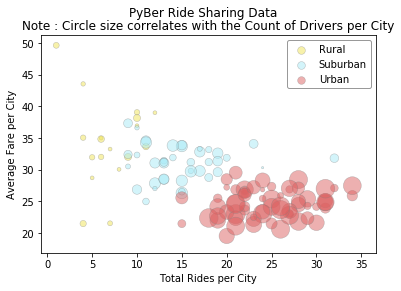

In [18]:
plt.show()

## By City Type

In [19]:
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [20]:
#Organized columns of data and rename column
DF_by_cityType = merged_df.groupby('type')['type', 'ride_id', 'fare', 'driver_count']
DF_by_cityType.head(2)

,type,ride_id,fare,driver_count
0,Urban,6246006544795,5.51,63
1,Urban,7466473222333,5.54,63
1625,Suburban,485795568537,25.00,4
1626,Suburban,617204620844,49.47,4
2250,Rural,8193837300497,22.79,3
2251,Rural,4943246873754,26.72,3


In [21]:
pie_color = ['#f1e556', '#a9ebf7', '#dd6262']
pie_explode = [0, 0.1, 0.1]

In [22]:
#Total Fare per City
totalFare_perCityType = DF_by_cityType.sum()['fare']

#index of the chart
pie_index = totalFare_perCityType.index

In [23]:
#Create the pie plot
plt.pie(totalFare_perCityType, 
        autopct='%.2f%%',
        colors=pie_color,
        explode=pie_explode,
        labels = pie_index,
        startangle = 90,
        shadow = True, 
        wedgeprops = {'linewidth':.5,'edgecolor': 'black'}
       )

([<matplotlib.patches.Wedge at 0x1a12cc9160>,
 [Text(-0.229323,1.07583,'Rural'),
  Text(-1.17672,0.235235,'Suburban'),
  Text(1.10182,-0.475382,'Urban')],
 [Text(-0.125085,0.586817,'6.68%'),
  Text(-0.686419,0.13722,'30.35%'),
  Text(0.64273,-0.277306,'62.97%')])

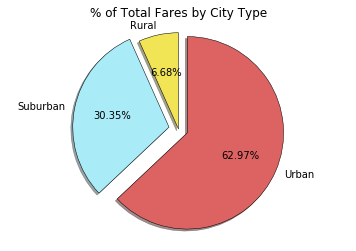

In [24]:
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

In [25]:
#% of Total Rides by City Type
totalRides_perCityType = DF_by_cityType.count()['ride_id']

In [26]:
#Create the pie plot
plt.pie(totalRides_perCityType, 
        autopct='%.2f%%',
        colors=pie_color,
        explode=pie_explode,
        labels = pie_index,
        startangle = 90,
        shadow = True, 
        wedgeprops = {'linewidth':.5,'edgecolor': 'black'}
       )

([<matplotlib.patches.Wedge at 0x1a12d1d518>,
 [Text(-0.181054,1.085,'Rural'),
  Text(-1.09893,0.482034,'Suburban'),
  Text(1.0046,-0.656338,'Urban')],
 [Text(-0.0987568,0.591817,'5.26%'),
  Text(-0.641041,0.281187,'26.32%'),
  Text(0.586017,-0.382864,'68.42%')])

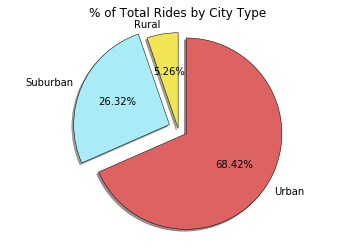

In [27]:
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## Total Drivers by City Type

In [28]:
#% of Total Drivers by City Type
totalDrivers_perCityType = DF_by_cityType.count()['driver_count']

In [29]:
#Create the pie plot
plt.pie(totalDrivers_perCityType, 
        autopct='%.2f%%',
        colors=pie_color,
        explode=pie_explode,
        labels = pie_index,
        startangle = 90,
        shadow = True, 
        wedgeprops = {'linewidth':.5,'edgecolor': 'black'}
       )

([<matplotlib.patches.Wedge at 0x1a1afb1ac8>,
 [Text(-0.181054,1.085,'Rural'),
  Text(-1.09893,0.482034,'Suburban'),
  Text(1.0046,-0.656338,'Urban')],
 [Text(-0.0987568,0.591817,'5.26%'),
  Text(-0.641041,0.281187,'26.32%'),
  Text(0.586017,-0.382864,'68.42%')])

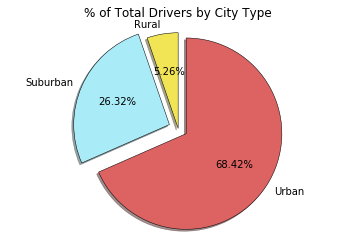

In [30]:
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()